### Chapter 10 | 딥러닝 프로그래밍 시작하기 #2

#### 1. 코로나 19 확진자 수 예측 인공지능 개발 원리

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

#### 2. 데이터 가져오기

In [2]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe= read_csv('/content/deeplearning/corona_daily.csv', usecols = [3], engine = 'python', skipfooter = 3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

fatal: destination path 'deeplearning' already exists and is not an empty directory.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


#### 3. 데이터 정규화 및 분류하기

In [3]:
scaler = MinMaxScaler(feature_range = (0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size = 0.2, shuffle = False)
print(len(train_data), len(test_data))

89 23


#### 4. 데이터 형태 변경하기

In [4]:
def create_dataset(dataset, look_back):
  x_data = []
  y_data = []
  for i in range(len(dataset) - look_back - 1):
    data = dataset[i:(i + look_back)]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

#### 5. 입력 데이터 생성하기

In [5]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3, 1) (85,)
(19, 3, 1) (19,)


#### 6. 인공지능 모델에 넣어줄 형태로 변환하기

In [6]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


#### 7. 인공지능 모델 만들기

In [7]:
model = Sequential()
model.add(SimpleRNN(3, input_shape = (1, look_back)))
model.add(Dense(1, activation = "linear"))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

#### 8. 모델 학습 시키기

In [8]:
model.fit(X_train, y_train, epochs = 100, batch_size = 1, verbose = 1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4182
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2625e-04
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4698e-04
Epoch 13/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9688e-04
Epoch 14/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6096e-04
Epoch 15/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

#### 8. 모델 학습 시키기

In [9]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


#### 9. 모델의 정확도 살펴보기

In [10]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8250.66 RMSE
Test Score: 111.42 RMSE


#### 10. 결과를 그래프로 확인하기

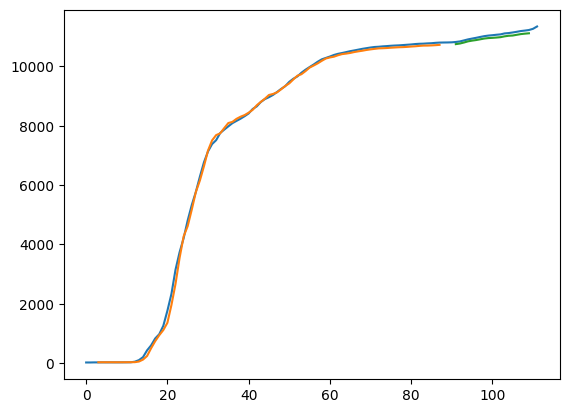

In [11]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:look_back + len(TrainPredict), :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
start = len(TrainPredict) + (look_back * 2)
testPredictPlot[start:start + len(TestPredict), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



```20244331 김민주```

